# Task 1

In [5]:
def qZ(x, y):
    return (x - 3 * y + 1)/(3 * x ** 2 + 3 * y ** 2 + 1)

def exchangeScheme(oldX, oldY, sortedID):
    x = [0 for i in range(4)]
    y = [0 for i in range(4)]

    x[2] = oldX[sortedID[2]]
    x[3] = oldX[sortedID[2]]

    x[0] = oldX[sortedID[0]]
    x[1] = oldX[sortedID[1]]

    y[0] = oldY[sortedID[2]]
    y[1] = oldY[sortedID[2]]

    y[2] = oldY[sortedID[0]]
    y[3] = oldY[sortedID[1]]

    return x, y

def sorting(z):
    return sorted(range(len(z)), key=lambda k: z[k])

def evoStep(x, y, z):
    _, min_id = min((value, key) for key, value in enumerate(z))

    x = x[:]
    y = y[:]
    z = z[:]

    x.pop(min_id)
    y.pop(min_id)
    z.pop(min_id)

    return x, y, z


def evoSteps(x, y, stepsNum=4):
    results = []

    for i in range(stepsNum):
        arrZ = [qZ(x, y[i]) for i, x in enumerate(x)]
        x, y, z = evoStep(x, y, arrZ)
        x, y = exchangeScheme(x, y, sorting(z))
        results.append([x, y, sum(arrZ), arrZ])

    return x, y, results


def main():
    x = [-2, -1, 0, 1]
    y = [-2, -1, 0, 1]
    results = evoSteps(x, y)

    quality = []
    for i in range(len(results[2])):
        print(f'max_{i + 1}_step: {results[2][i][2]}')
        quality += results[2][i][3]

    print(f'max Z:{max(quality)}')

main()

max_1_step: 1.4857142857142858
max_2_step: 1.4615384615384615
max_3_step: 2.967032967032967
max_4_step: 3.5384615384615383
max Z:1.0


# Task 2

лучший выбранный маршрут: [1, 2, 3, 4, 5, 6, 1]
длина лучшего выбранного маршрута: 131
длины всех рассмотренных маршрутов: [131, 131, 131, 131, 131]


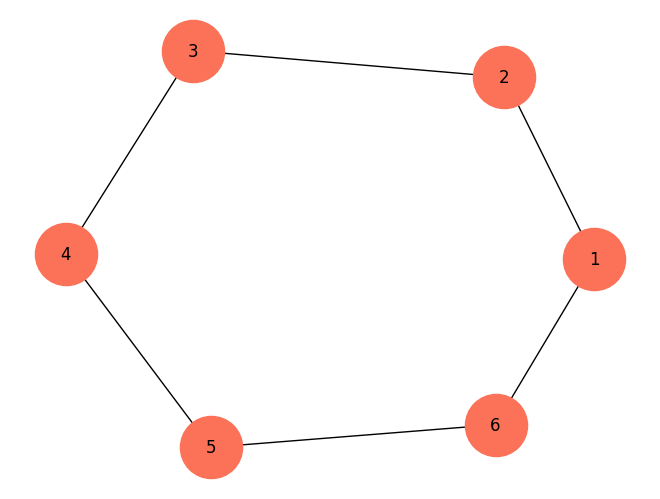

In [16]:
import networkx as nx
from math import e


def probability(delta, t):
    return 100 * e ** (-delta / t)


def reductTemp(prevT):
    nextT = 0.5 * prevT
    return nextT


def edgeLength(i, j, distances, round_trip=True):
    if round_trip:
        return max([(item[2] if (item[0] == i and item[1] == j) or (item[1] == i and item[0] == j) else -1)
                    for item in distances])
    else:
        return max([(item[2] if (item[0] == i and item[1] == j) else -1) for item in distances])


def routeLength(v, distances):
    edges = []
    for i in range(len(v) - 1):
        edges.append(edgeLength(v[i], v[i + 1], distances))
    return sum(edges)


def routeOneReplacement(arrV, z, replacementByName=True):
    arrV[z[0] - replacementByName], arrV[z[1] - replacementByName] = arrV[z[1] - replacementByName], arrV[z[0] - replacementByName]
    return arrV


def routeReplacement(v, z):
    for i in z:
        v = routeOneReplacement(v, z)
    return v


def chooseRoute(distances, v, z, t, p):
    sumLength = routeLength(v, distances)
    sumList = [sumLength]

    for i in range(len(z)):
        new_v = routeReplacement(v[:], z[i])
        new_s = routeLength(new_v, distances)
        sumList.append(new_s)
        delta_s = new_s - sumLength

        if delta_s <= 0 or probability(delta_s, t) > p[i]:
            v = new_v
            sumLength = new_s

        t = reduce_temp(t)

    return v, sumList


def drawRouteGraph(distances, bestRoute):
    newDistances = []

    for i in range(len(bestRoute) - 1):
        for distance in distances:
            if distance[0] == bestRoute[i] and distance[1] == bestRoute[i + 1] or \
                    distance[1] == bestRoute[i] and distance[0] == bestRoute[i + 1]:
                newDistances.append(distance)

    graph = nx.Graph()
    graph.add_weighted_edges_from(newDistances)
    nx.draw_kamada_kawai(graph, node_color='#fb7258', node_size=2000, with_labels=True)


def main():
    distances = [(1, 2, 19),
                 (1, 3, 39),
                 (1, 4, 35),
                 (1, 5, 26),
                 (1, 6, 18),
                 (2, 3, 26),
                 (2, 4, 33),
                 (2, 5, 37),
                 (2, 6, 14),
                 (3, 4, 22),
                 (3, 5, 41),
                 (3, 6, 21),
                 (4, 5, 22),
                 (4, 6, 19),
                 (5, 6, 24)]

    v = [1, 2, 3, 4, 5, 6, 1]
    z = [(3, 4),
         (4, 6),
         (5, 6),
         (6, 2)]
    p = [90, 45, 43, 31]

    t = 100

    bestRoute, length = chooseRoute(distances, v, z, t, p)
    print(f'лучший выбранный маршрут: {bestRoute}')
    print(f'длина лучшего выбранного маршрута: {routeLength(bestRoute, distances)}')
    print(f'длины всех рассмотренных маршрутов: {length}')

    drawRouteGraph(distances, bestRoute)


if __name__ == '__main__':
    main()